![Colegio Bourbaki](./Images/Bourbaki.png)

## Grandes Modelos de Lenguaje

En la última década, el campo del procesamiento del lenguaje natural (NLP, por sus siglas en inglés) ha experimentado avances significativos gracias al desarrollo de los grandes modelos de lenguaje. Estos modelos, basados en arquitecturas de redes neuronales profundas como los transformers, han revolucionado la manera en que las máquinas entienden y generan texto humano. El éxito de estos modelos se atribuye principalmente a su capacidad para aprender patrones complejos del lenguaje a partir de enormes volúmenes de datos textuales.

Los grandes modelos de lenguaje, como GPT (Generative Pre-trained Transformer) de OpenAI, BERT (Bidirectional Encoder Representations from Transformers) de Google, y otros modelos similares desarrollados por empresas como Facebook y Microsoft, son ejemplos destacados de esta tecnología. Estos modelos son preentrenados en un rango extenso de datos de Internet antes de ser afinados para tareas específicas de NLP, como la traducción automática, el resumen de textos, la generación de contenido, entre otros.

### Generación de texto

La generación de texto es una de las aplicaciones más impresionantes de los grandes modelos de lenguaje. Utilizando lo que han aprendido durante el entrenamiento, estos modelos pueden producir textos que van desde respuestas a preguntas hasta artículos completos de manera coherente y contextualmente adecuada. Esto se logra a través de un proceso donde el modelo predice la siguiente palabra en una secuencia dada una serie de palabras anteriores, iterando este proceso para generar secuencias de texto de longitud variable.

No obstante, el despliegue de grandes modelos de lenguaje no está exento de desafíos. La generación de lenguaje automático plantea preguntas éticas importantes, especialmente en cuanto a la veracidad y el sesgo del contenido generado. Además, el entrenamiento y la operación de estos modelos requieren una cantidad considerable de recursos computacionales, lo que plantea preocupaciones sobre la sostenibilidad y la accesibilidad de estas tecnologías.

A medida que avanzamos, es crucial que la comunidad de investigación en IA aborde estos desafíos de manera ética y responsable, asegurando que los beneficios de los grandes modelos de lenguaje sean accesibles para todos y que sus aplicaciones se desarrollen de manera que beneficie a la sociedad en su conjunto.

### Hugging Face

Hugging Face es una compañía líder en el campo de la inteligencia artificial que se ha especializado en el desarrollo y la aplicación de tecnologías de procesamiento del lenguaje natural (NLP, por sus siglas en inglés). Fundada en 2016, inicialmente comenzó como una aplicación social para compartir emojis y GIFs, pero rápidamente se transformó en un pionero de la IA al reconocer el potencial de los modelos de lenguaje.

La contribución más significativa de Hugging Face al mundo de la IA ha sido su plataforma y biblioteca de modelos de transformers, que facilita a los desarrolladores y científicos de datos el acceso a modelos de lenguaje preentrenados y las herramientas necesarias para entrenarlos y desplegarlos. La biblioteca Transformers, su producto más conocido, incluye una amplia variedad de modelos de última generación, como BERT, GPT, T5, y muchos otros, que se pueden utilizar para una amplia gama de tareas de NLP.

El enfoque de Hugging Face hacia la democratización de la IA también se refleja en su comunidad colaborativa y de código abierto. La compañía promueve una cultura de colaboración y transparencia, permitiendo que investigadores, desarrolladores y empresas compartan modelos y técnicas, fomentando así la innovación y el progreso en el campo. Además, Hugging Face también se esfuerza por abordar los aspectos éticos de la IA, trabajando en la mejora del entendimiento y la reducción de sesgos en los modelos de lenguaje.

Con una creciente comunidad de usuarios y contribuyentes, Hugging Face sigue a la vanguardia de la investigación en IA, ofreciendo soluciones que no solo avanzan en el estado del arte, sino que también se esfuerzan por ser éticamente responsables y accesibles para todos.

### Librerias

In [1]:
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments

### Configuraciones

In [2]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
!set 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:2'
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True
torch.cuda.empty_cache()
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False

### Carga de Datos

In [3]:
dataset = load_dataset("andersonbcdefg/biology")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['role_1', 'topic;', 'sub_topic', 'message_1', 'message_2'],
        num_rows: 20000
    })
})

In [5]:
# Split the training set to obtain a random sample of 10,000 rows
sampled_dataset = dataset["train"].train_test_split(test_size=10000, seed=42)

In [6]:
dataset = sampled_dataset["train"].train_test_split(test_size=0.2)

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['role_1', 'topic;', 'sub_topic', 'message_1', 'message_2'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['role_1', 'topic;', 'sub_topic', 'message_1', 'message_2'],
        num_rows: 2000
    })
})

### Análisis Exploratiorio

In [8]:
# Convert the train and test datasets to pandas DataFrames
train_df = dataset["train"].to_pandas()

In [9]:
train_df.head()

,role_1,topic;,sub_topic,message_1,message_2
0,Biologist_RoleType.ASSISTANT,Taxonomy,Identification of the correct taxonomic rank f...,Identify the correct taxonomic rank for the or...,"The organism ""Felis catus"" belongs to the spec..."
1,Biologist_RoleType.ASSISTANT,Biogeography,The biogeography of savanna ecosystems and the...,How has human activity affected the biogeograp...,Human activity has significantly impacted the ...
2,Biologist_RoleType.ASSISTANT,Biotechnology,Developing new methods for producing biodegrad...,How can the development of new methods for pro...,The development of new methods for producing b...
3,Biologist_RoleType.ASSISTANT,Ecology,Overfishing and depletion of fish populations,How does overfishing impact the food web and e...,Overfishing has significant impacts on the foo...
4,Biologist_RoleType.ASSISTANT,Anatomy,Explain the structure and function of the huma...,How does the process of phagocytosis contribut...,Phagocytosis is a crucial process in the immun...


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   role_1     8000 non-null   object
 1   topic;     8000 non-null   object
 2   sub_topic  8000 non-null   object
 3   message_1  8000 non-null   object
 4   message_2  8000 non-null   object
dtypes: object(5)
memory usage: 312.6+ KB


In [11]:
# Frequency of categories in 'topic;'
print(train_df["topic;"].value_counts())

topic;
Entomology        339
Endocrinology     336
Ecology           333
Biotechnology     332
Immunology        331
Taxonomy          330
Biostatistics     327
Biophysics        325
Biogeography      325
Neurobiology      323
Genetics          322
Physiology        321
Cell biology      320
Parasitology      317
Biomechanics      317
Microbiology      317
Botany            316
Paleontology      314
Marine biology    312
Anatomy           312
Zoology           311
Evolution         308
Biochemistry      306
Mycology          304
Virology          302
Name: count, dtype: int64


In [12]:
# Frequency of categories in 'sub_topic'
train_df["sub_topic"].value_counts()

sub_topic
Identification of the correct phylum for a given species                      22
The evolution of antibiotic resistance in bacteria                            21
The process of inflammation in the immune response                            20
The role of T cells in the immune response                                    19
Describe the anatomy of the human brain and its different regions.            19
                                                                              ..
The evolution of carnivorous mammals and their adaptations                     6
The use of insects as bioindicators of environmental health                    6
Fungal infections and their treatment                                          6
The biogeography of alpine ecosystems and their unique species assemblages     6
Cancer biology and tumor growth                                                5
Name: count, Length: 624, dtype: int64

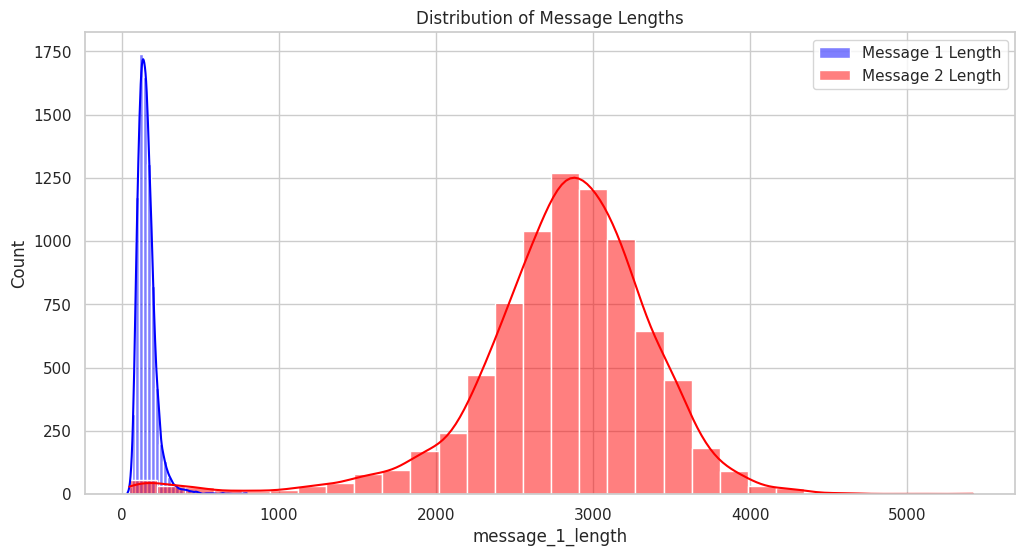

In [13]:
# Setting the aesthetic style for the plots
sns.set_theme(style="whitegrid")

# Visualizing message lengths
train_df["message_1_length"] = train_df["message_1"].apply(len)
train_df["message_2_length"] = train_df["message_2"].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(
    train_df["message_1_length"],
    bins=30,
    label="Message 1 Length",
    kde=True,
    color="blue",
)
sns.histplot(
    train_df["message_2_length"],
    bins=30,
    label="Message 2 Length",
    kde=True,
    color="red",
)
plt.legend()
plt.title("Distribution of Message Lengths")
plt.show()

### Modelo GPT2 Distilled

In [14]:
model_checkpoint = "distilgpt2"

In [15]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token

In [16]:
def tokenize_function(example):
    # Assuming example['message_1'] and example['message_2'] are the fields you want to tokenize
    tokenized_output = tokenizer(
        example["message_2"], padding="max_length", truncation=True, return_tensors="np"
    )
    return {
        "input_ids": tokenized_output["input_ids"].tolist(),
        "attention_mask": tokenized_output["attention_mask"].tolist(),
    }

In [17]:
tokenized_datasets = dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=["role_1", "topic;", "sub_topic", "message_1", "message_2"],
)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [18]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [19]:
#block_size = tokenizer.model_max_length
block_size = 128  # Set your block size appropriately
block_size

128

In [20]:
def group_texts(examples):
    # Concatenate all texts.
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can customize this part to your needs.
    total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

In [22]:
lm_datasets = tokenized_datasets.map(
    group_texts,
    batched=True,
    batch_size=1024,
)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

### Training

In [23]:
model = AutoModelForCausalLM.from_pretrained(model_checkpoint)

In [24]:
LR = 0.001

In [25]:
model_name = model_checkpoint.split("/")[-1]

In [26]:
training_args = TrainingArguments(
    f"{model_name}-finetuned-microbiology",
    evaluation_strategy="epoch",
    learning_rate=LR,
    weight_decay=LR * 0.1,
    push_to_hub=False,
)

In [27]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=lm_datasets["train"],
    eval_dataset=lm_datasets["test"],
)

In [28]:
trainer.train()

  0%|          | 0/24000 [00:00<?, ?it/s]

{'loss': 1.7738, 'grad_norm': 0.6295139193534851, 'learning_rate': 0.0009791666666666666, 'epoch': 0.06}
{'loss': 1.5391, 'grad_norm': 1.1391187906265259, 'learning_rate': 0.0009583333333333334, 'epoch': 0.12}
{'loss': 1.4191, 'grad_norm': 0.8768649697303772, 'learning_rate': 0.0009375, 'epoch': 0.19}
{'loss': 1.3455, 'grad_norm': 0.774774968624115, 'learning_rate': 0.0009166666666666666, 'epoch': 0.25}
{'loss': 1.3029, 'grad_norm': 0.6644452214241028, 'learning_rate': 0.0008958333333333334, 'epoch': 0.31}
{'loss': 1.2511, 'grad_norm': 0.89124596118927, 'learning_rate': 0.000875, 'epoch': 0.38}
{'loss': 1.2666, 'grad_norm': 0.8505674600601196, 'learning_rate': 0.0008541666666666666, 'epoch': 0.44}
{'loss': 1.2512, 'grad_norm': 0.864046037197113, 'learning_rate': 0.0008333333333333334, 'epoch': 0.5}
{'loss': 1.2117, 'grad_norm': 0.6058117151260376, 'learning_rate': 0.0008125000000000001, 'epoch': 0.56}
{'loss': 1.1822, 'grad_norm': 0.6281679272651672, 'learning_rate': 0.0007916666666666

  0%|          | 0/2000 [00:00<?, ?it/s]

{'eval_loss': 1.03952956199646, 'eval_runtime': 237.5707, 'eval_samples_per_second': 67.348, 'eval_steps_per_second': 8.419, 'epoch': 1.0}
{'loss': 0.9641, 'grad_norm': 0.9073527455329895, 'learning_rate': 0.0006458333333333334, 'epoch': 1.06}
{'loss': 0.9285, 'grad_norm': 0.6667528748512268, 'learning_rate': 0.000625, 'epoch': 1.12}
{'loss': 0.9486, 'grad_norm': 0.73509281873703, 'learning_rate': 0.0006041666666666666, 'epoch': 1.19}
{'loss': 0.9278, 'grad_norm': 0.6674950122833252, 'learning_rate': 0.0005833333333333334, 'epoch': 1.25}
{'loss': 0.9154, 'grad_norm': 0.8021742701530457, 'learning_rate': 0.0005625000000000001, 'epoch': 1.31}
{'loss': 0.9097, 'grad_norm': 0.7788023352622986, 'learning_rate': 0.0005416666666666666, 'epoch': 1.38}
{'loss': 0.899, 'grad_norm': 0.5974372625350952, 'learning_rate': 0.0005208333333333334, 'epoch': 1.44}
{'loss': 0.8968, 'grad_norm': 0.7444320321083069, 'learning_rate': 0.0005, 'epoch': 1.5}
{'loss': 0.9026, 'grad_norm': 0.7499492764472961, 'le

  0%|          | 0/2000 [00:00<?, ?it/s]

{'eval_loss': 0.9057227969169617, 'eval_runtime': 237.975, 'eval_samples_per_second': 67.234, 'eval_steps_per_second': 8.404, 'epoch': 2.0}
{'loss': 0.7176, 'grad_norm': 0.8705700039863586, 'learning_rate': 0.0003125, 'epoch': 2.06}
{'loss': 0.727, 'grad_norm': 0.725726842880249, 'learning_rate': 0.0002916666666666667, 'epoch': 2.12}
{'loss': 0.6978, 'grad_norm': 0.969544529914856, 'learning_rate': 0.0002708333333333333, 'epoch': 2.19}
{'loss': 0.6877, 'grad_norm': 0.7479664087295532, 'learning_rate': 0.00025, 'epoch': 2.25}
{'loss': 0.6909, 'grad_norm': 0.7540022730827332, 'learning_rate': 0.00022916666666666666, 'epoch': 2.31}
{'loss': 0.6827, 'grad_norm': 0.5013659596443176, 'learning_rate': 0.00020833333333333335, 'epoch': 2.38}
{'loss': 0.707, 'grad_norm': 0.6908199787139893, 'learning_rate': 0.0001875, 'epoch': 2.44}
{'loss': 0.6871, 'grad_norm': 0.705662190914154, 'learning_rate': 0.00016666666666666666, 'epoch': 2.5}
{'loss': 0.6896, 'grad_norm': 0.5484470725059509, 'learning_r

  0%|          | 0/2000 [00:00<?, ?it/s]

{'eval_loss': 0.8584967851638794, 'eval_runtime': 236.0004, 'eval_samples_per_second': 67.796, 'eval_steps_per_second': 8.475, 'epoch': 3.0}
{'train_runtime': 9737.2079, 'train_samples_per_second': 19.718, 'train_steps_per_second': 2.465, 'train_loss': 0.9490508346557617, 'epoch': 3.0}


TrainOutput(global_step=24000, training_loss=0.9490508346557617, metrics={'train_runtime': 9737.2079, 'train_samples_per_second': 19.718, 'train_steps_per_second': 2.465, 'train_loss': 0.9490508346557617, 'epoch': 3.0})

In [32]:
save_directory = "./Data/Model/"

In [33]:
model.save_pretrained(save_directory)

In [34]:
tokenizer.save_pretrained(save_directory)

('./Data/Model/tokenizer_config.json',
 './Data/Model/special_tokens_map.json',
 './Data/Model/vocab.json',
 './Data/Model/merges.txt',
 './Data/Model/added_tokens.json',
 './Data/Model/tokenizer.json')

### Testing

In [24]:
def generate_text(prompt, model_path):
    # Load tokenizer and model from the specified model directory
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForCausalLM.from_pretrained(model_path)

    # Encode the prompt text with attention mask
    encoding = tokenizer(prompt, return_tensors='pt', padding=True, truncation=True)

    # Generate text using the model
    outputs = model.generate(
        input_ids=encoding['input_ids'],
        attention_mask=encoding['attention_mask'],
        max_length=512,
        pad_token_id=tokenizer.eos_token_id,  # Set pad_token_id to eos_token_id
        num_return_sequences=1
    )

    # Decode and print the output text
    decoded_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(decoded_output)

In [25]:
model_directory = "./Data/Model/"

##### Prompting

In [27]:
prompt_text = "Explain the role of bacteria in the nitrogen cycle."
generate_text(prompt_text, model_directory)

Explain the role of bacteria in the nitrogen cycle.

2. Nitrogen fixation: Some bacteria, such as Rhizobium and Azotobacter, convert atmospheric nitrogen (N2) into ammonia (NH3), which can be used by plants. This process is essential for the growth and development of legumes, as it helps to mitigate the negative effects of nitrogen limitation on plant growth and development.

3. Decomposition and nutrient cycling: Microorganisms, particularly bacteria and fungi, play a vital role in breaking down dead organic matter and recycling nutrients back into the soil. This process is essential for maintaining soil fertility and supporting plant growth.

4. Plant growth-promoting rhizobacteria (PGPR (PGPR): Some bacteria and fungi, such as Pseudomonas spp. can suppress plant growth-promoting rhizobacteria, can enhance plant growth by producing plant growth-promoting rhizobacteria, which can enhance plant growth-promoting rhizobacteria, which can enhance plant growth by producing plant growth-pro

In [28]:
prompt_text = "Describe the process of gram staining and its significance in microbiology."
generate_text(prompt_text, model_directory)

Describe the process of gram staining and its significance in microbiology. They are used to identify and isolate bacterial pathogens, such as bacteria, fungi, and viruses, and to establish a mutually beneficial relationship with the host.

The significance of using microbial biotechnology in the development of antibiotic-resistant bacteria lies in the following aspects:

1. Strain selection: By using microbial biotechnology in the development of antibiotic-resistant bacteria, we can create a selection pressure that favors the survival and proliferation of resistant strains. This can be achieved through the selection of strains with the highest potential for antibiotic production.

2. Genetic engineering: By modifying the genes of microorganisms, we can create bacteria with improved antibiotic production capabilities, such as increased yield, stability, or stability, or specificity, or specificity, we can be more effective in the production of antibiotics, or stability, or stability, o

In [29]:
prompt_text = "Discuss the impact of antibiotics on human gut microbiota."
generate_text(prompt_text, model_directory)

Discuss the impact of antibiotics on human gut microbiota. Some studies have shown that certain probiotic strains, such as Lactobacillus and Bifidobacterium, can help restore a healthy balance of gut microbiota, which can lead to improved gut health and reduced inflammation.

In conclusion, probiotics have been shown to have a positive impact on the composition and function of the gut microbiota, leading to improved health outcomes. However, it is essential to note that the evidence is not yet strong enough to fully understand the relationship between probiotics and human health. It is essential to consult with a healthcare professional to determine the most effective probiotic strains, dosages, and dosages, and treatment durations of treatment, and duration of treatment, and duration of treatment, and duration of treatment.


In [30]:
prompt_text = "Outline the methods used to culture viruses in the laboratory."
generate_text(prompt_text, model_directory)

Outline the methods used to culture viruses in the laboratory. This method involves isolating and growing the virus in a controlled environment, usually in a laboratory setting. The method can be time-consuming and requires specialized facilities and expertise.

1. Microscopic examination: This involves examining the virus in a sample, usually in a laboratory setting. The virus can be found in a laboratory setting, such as a laboratory setting, where it can be easily examined by a healthcare professional. The test can be time-consuming and may not be feasible for large-scale testing.

2. Viral culture: This method involves isolating and growing the virus in a laboratory setting up a large number of cells, usually in a laboratory setting up of cells, usually in a laboratory setting up of cells, usually in a laboratory setting up to a laboratory setting. The virus in a laboratory setting. The virus in a laboratory setting. The virus culture medium is usually using a laboratory setting. T

In [31]:
prompt_text = "Compare and contrast aerobic and anaerobic bacteria."
generate_text(prompt_text, model_directory)

Compare and contrast aerobic and anaerobic bacteria.

2. Aerobic bacteria:

a) Aerobic bacteria: These bacteria, such as Aspergillus and Penicillium, are aerobic bacteria that can break down organic matter and release oxygen. They can be found in various indoor environments, including hospitals, hospitals, and even even within the air.

b) Fungi: These bacteria are found in various indoor environments, including hospitals, hospitals, and even within the air. They can be found in various indoor environments, including hospitals, hospitals, and even within the airway.

c) Fungi: Fungi are a diverse group of microorganisms that can be found in various indoor environments, including air, including damp, air, air, air, and air, and air, and air, and air, and air, and air, and air, and air. They can be used to damp. They can be used to slow down. They can be used to slow down or eliminate the rate-release particles and slow down. They can be inhaled. They can be inhaled. They can be inhaled.

Ejercicio: **Tratar de mejorar el modelo**

Veamos que sucede si introducimos un 'prompt' que no tenga relación alguna con el texto:

In [32]:
prompt_text = "Tell me the history of Manchester City F.C."
generate_text(prompt_text, model_directory)

Tell me the history of Manchester City F.C.E.E. coli (E. coli) and Salmonella are both commonly used in indoor environments, but they share some similarities and differences.

To identify the correct common name for a given species of mold, we can use a combination of characteristics, including:

1. Temperature: Most molds grow best at moderate temperatures, typically between 20°C and 30°C. However, some species prefer cooler temperatures, like thermophilic fungi, which thrive at higher temperatures.

2. Humidity: Maintaining indoor humidity levels between 30°C and 60°C can help prevent the growth of mold and hyphae.


3. Drying out moisture: Removing moisture: Removing moisture from indoor air and moisture can help cool the air in indoor air close to prevent moisture, reducing moisture and dampness, which can slow down the growth of indoor air circulation and dampness and dampness.
4.
4.
5°C.
5°C.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9.9

### Preguntas

**Preguntas Básicas**

1) ¿Qué es Hugging Face y cuál es su contribución principal al campo del procesamiento del lenguaje natural?

2) ¿Qué es un "transformer" en el contexto de aprendizaje automático?

3) Menciona al menos tres aplicaciones prácticas de los modelos transformer.

**Preguntas Intermedias**

4) ¿Cómo funciona la atención auto-dirigida en los modelos de transformers?

5) Explica la diferencia entre los modelos AutoModel y AutoTokenizer en la biblioteca Transformers de Hugging Face.

6) ¿Cuáles son las ventajas de utilizar la biblioteca Transformers para el desarrollo de modelos de NLP?

**Preguntas Avanzadas**

7) Describe el proceso de fine-tuning de un modelo transformer preentrenado para una tarea específica de NLP.
    
8) ¿Qué consideraciones se deben tener en cuenta al desplegar modelos transformers en producción?

9) Discute el impacto ético del uso de modelos de lenguaje grande como GPT-3 en la sociedad.

**Pregunta de Aplicación**

10) Diseña un experimento utilizando un modelo transformer para identificar el sentimiento de los tweets. Incluye qué modelo usarías, cómo entrenarías el modelo, y cómo evaluarías su rendimiento.
      